
# Time series 'model_s4_v_090122'   
### Algorithm: Least Angle Regression
(Machine Learning model)



### total time period copvered by model: 15-Aug-2020 -> 09 Nov 2020 window 



##### test set performce (07-Nov-2020 -> 09 Nov 2020 window)
>Test RMSE:    0.109  
>Test MAPE:    0.043   
>Correlation:  0.872    
>R-squared:    0.761

#### target feature: MW (thermic)
#### exogenous features: m3/h, Series, Month, 'Day

### Data Engineering

In [1]:
# pip install xlrd                                  #once
import pip
!pip list

C:\Users\DANIELE\anaconda3\envs\PyCaret_RENergetic_2022_v01\lib\site-packages\_distutils_hack\__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Package                       Version
----------------------------- -----------
aiohttp                       3.8.1
aiosignal                     1.2.0
alembic                       1.4.1
analytics-python              1.4.0
ansi2html                     1.7.0
anyio                         3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asgiref                       3.5.0
asttokens                     2.0.5
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
autopage                      0.4.0
autoviz                       0.1.36
azure-core                    1.20.1
azure-storage-blob            12.9.0
backcall                      0.2.0
backoff                       1.10.0
backports.functools-lru-cache 1.6.4
bcrypt                        3.2.0
bleach                        4.1.0
blis                          0.7.5
bokeh                         2.4.2
Boruta        

In [2]:
#some dependncies
import pandas as pd
import numpy as np
import os
CURR_DIR = os.getcwd()                             # method to check working directory
print(CURR_DIR)

C:\Users\DANIELE\anaconda3\envs\PyCaret_RENergetic_2022_toDrop


In [3]:
# !pip3 install xlrd                                  #(once)

In [4]:
# !pip install plotly                                 #install once

In [5]:
# !pip install pycaret[full]                          #install once

In [6]:
# read csv file
data = pd.read_excel('TEST_1b - for bktst.xls')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data['Date']=pd.to_datetime(data['date'])
# data

data=data[['Date','MW','m3_h']]
data

,Date,MW,m3_h
0,2020-08-15 00:00:00.000,0.94,59.8
1,2020-08-15 01:00:00.029,0.94,59.8
2,2020-08-15 01:59:59.971,1.07,64.6
3,2020-08-15 03:00:00.000,0.91,56.2
4,2020-08-15 04:00:00.029,0.99,64.6
...,...,...,...
2083,2020-11-09 19:00:00.029,1.76,103.3
2084,2020-11-09 19:59:59.971,1.76,103.6
2085,2020-11-09 21:00:00.000,1.91,104.8
2086,2020-11-09 22:00:00.029,2.01,104.8


In [7]:
data['MW_MA12'] = data['MW'].rolling(12).mean()                   # 12 month moving average of MW
# data['m3_h_MA12'] = data['m3_h'].rolling(12).mean()             # 12 month moving average of m3_h
# data

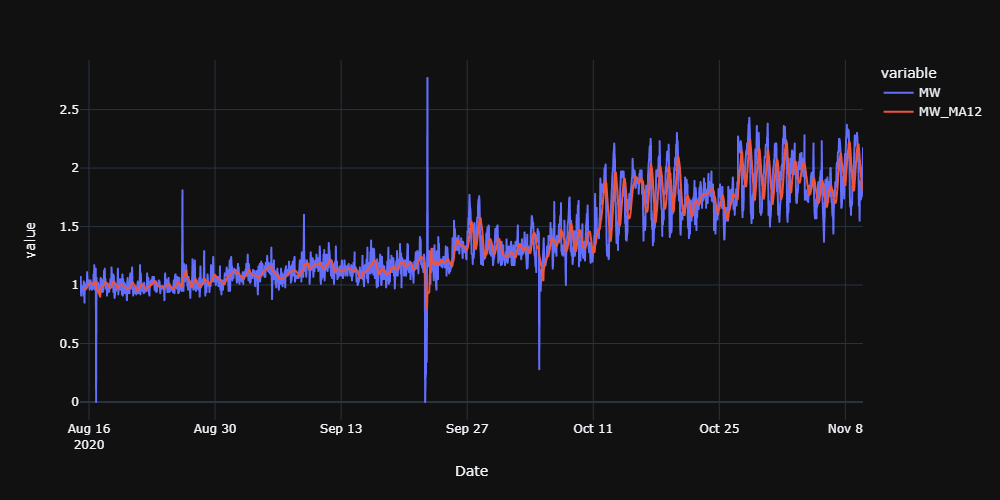

In [8]:
# plot the data and MA
import plotly.express as px
fig=px.line(data,x='Date',y=['MW','MW_MA12'], template = 'plotly_dark')

fig.show('png',width=1000)

In [9]:
#extract year, month, day, hour from Date (transformed to_datetime previously)
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data['Hour']=data['Date'].dt.hour+1

In [10]:
data['Series']=np.arange(1,len(data)+1)                          #add Series vector as position of each timestamp
data

,Date,MW,m3_h,MW_MA12,Year,Month,Day,Hour,Series
0,2020-08-15 00:00:00.000,0.94,59.8,NaN,2020,8,15,1,1
1,2020-08-15 01:00:00.029,0.94,59.8,NaN,2020,8,15,2,2
2,2020-08-15 01:59:59.971,1.07,64.6,NaN,2020,8,15,2,3
3,2020-08-15 03:00:00.000,0.91,56.2,NaN,2020,8,15,4,4
4,2020-08-15 04:00:00.029,0.99,64.6,NaN,2020,8,15,5,5
...,...,...,...,...,...,...,...,...,...
2083,2020-11-09 19:00:00.029,1.76,103.3,1.879167,2020,11,9,20,2084
2084,2020-11-09 19:59:59.971,1.76,103.6,1.837500,2020,11,9,20,2085
2085,2020-11-09 21:00:00.000,1.91,104.8,1.825000,2020,11,9,22,2086
2086,2020-11-09 22:00:00.029,2.01,104.8,1.810000,2020,11,9,23,2087


In [11]:
data.drop(['Date','MW_MA12'],axis=1,inplace=True)                 #drop Date and MW_MA12
data=data[['Series','Month','Day','Hour','m3_h','MW']]            #reorder columns with [['1','2','3']] code
data

,Series,Month,Day,Hour,m3_h,MW
0,1,8,15,1,59.8,0.94
1,2,8,15,2,59.8,0.94
2,3,8,15,2,64.6,1.07
3,4,8,15,4,56.2,0.91
4,5,8,15,5,64.6,0.99
...,...,...,...,...,...,...
2083,2084,11,9,20,103.3,1.76
2084,2085,11,9,20,103.6,1.76
2085,2086,11,9,22,104.8,1.91
2086,2087,11,9,23,104.8,2.01


### train-test split

In [12]:
train=data.loc[:2015]
test=data.loc[2016:]
train.shape, test.shape

((2016, 6), (72, 6))

### FEATURE SELECTION - Information Gain (IG) on all data and training data
#### IG indication is to drop 'Hour' feature predictor

In [13]:
# !pip install -U scikit-learn                      #install dependency once

In [14]:
!pip show scikit-learn                              #method to check out location and info on dependency ...#this command returns a warning. it does not find package               

Name: scikit-learn
Version: 0.23.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\daniele\appdata\roaming\python\python38\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: autoviz, Boruta, category-encoders, dtreeviz, evidently, explainerdashboard, fairlearn, imbalanced-learn, kmodes, lightgbm, lime, mlxtend, pmdarima, pycaret, pynndescent, pyod, scikit-optimize, scikit-plot, shap, skope-rules, sktime, tbats, tune-sklearn, umap-learn, yellowbrick


In [15]:
#feature selection via IG 
#dependencies
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [16]:
#all samples - data preprocessing
xs=data.drop('MW',axis=1)
y=data['MW']

#### IG on all samples - indication is to drop 'Hour'

In [17]:
k=5
bestfeatures=SelectKBest(score_func=mutual_info_regression,k=k)        #Infiormation Gain IG ; used mutual_info_regression
fit=bestfeatures.fit(xs, y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(xs.columns)
featureScores=pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Specs', 'Score']
# print(featureScores)
featureScores.nlargest(k,'Score')

,Specs,Score
4,m3_h,1.406095
0,Series,1.082391
1,Month,0.653945
2,Day,0.191418
3,Hour,0.089374


#### IG on training samples ONLY - indication is to drop 'Hour'

In [18]:
xs=train.drop('MW',axis=1)                                             #training samples used to avoid data leackage 
y=train['MW']
xs

,Series,Month,Day,Hour,m3_h
0,1,8,15,1,59.8
1,2,8,15,2,59.8
2,3,8,15,2,64.6
3,4,8,15,4,56.2
4,5,8,15,5,64.6
...,...,...,...,...,...
2011,2012,11,6,20,111.1
2012,2013,11,6,20,107.5
2013,2014,11,6,22,113.2
2014,2015,11,6,23,105.8


In [19]:
bestfeatures=SelectKBest(score_func=mutual_info_regression, k=k)        #Infiormation Gain IG ; used mutual_info_regression
fit=bestfeatures.fit(xs, y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(xs.columns)
featureScores=pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Specs', 'Score']
# print(featureScores)
featureScores.nlargest(k,'Score')

,Specs,Score
4,m3_h,1.399384
0,Series,1.068943
1,Month,0.628393
2,Day,0.207119
3,Hour,0.091247


### Initialize Setup (PyCaret 2.3.5 - full)

In [20]:
# !pip install --user pycaret[full]

In [21]:
# !pip show pycaret[full]                   #this command returns a warning. it does not find package
# !pip list
# !pip freeze

In [22]:
from pycaret.regression import *

## final model_s4 ('m3_h','Series','Month','Day') with least angle regression (lar)

In [23]:
s4=setup(data=train,
        test_data=test,
        target='MW',
        fold_strategy='timeseries',
        numeric_features=['m3_h','Series','Month','Day'],
        ignore_features=['Hour'],
        fold=3,
        transform_target=False,
        session_id=123,
        log_experiment=True,experiment_name='model_s4_003',log_plots=True)

,Description,Value
0,session_id,123
1,Target,MW
2,Original Data,"(2016, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2016, 4)"


In [24]:
get_config('X_train')

,Series,Month,Day,m3_h
0,1.0,8.0,15.0,59.799999
1,2.0,8.0,15.0,59.799999
2,3.0,8.0,15.0,64.599998
3,4.0,8.0,15.0,56.200001
4,5.0,8.0,15.0,64.599998
...,...,...,...,...
2011,2012.0,11.0,6.0,111.099998
2012,2013.0,11.0,6.0,107.500000
2013,2014.0,11.0,6.0,113.199997
2014,2015.0,11.0,6.0,105.800003


In [25]:
get_config('y_test')

2016    1.94
2017    2.04
2018    2.05
2019    2.00
2020    2.13
        ... 
2083    1.76
2084    1.76
2085    1.91
2086    2.01
2087    2.17
Name: MW, Length: 72, dtype: float32

In [26]:
best_s4=compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0667,0.0087,0.0900,0.8127,0.0356,0.0446,3.2967
lar,Least Angle Regression,0.0668,0.0087,0.0901,0.8127,0.0356,0.0446,0.0300
br,Bayesian Ridge,0.0677,0.0090,0.0915,0.8073,0.0361,0.0451,0.0233
ridge,Ridge Regression,0.0683,0.0092,0.0921,0.8046,0.0363,0.0454,0.0200
huber,Huber Regressor,0.0701,0.0099,0.0958,0.7873,0.0381,0.0469,0.0300
rf,Random Forest Regressor,0.0803,0.0125,0.1111,0.6880,0.0438,0.0538,0.2667
omp,Orthogonal Matching Pursuit,0.0822,0.0121,0.1059,0.7393,0.0421,0.0546,0.0167
gbr,Gradient Boosting Regressor,0.0873,0.0152,0.1217,0.6249,0.0484,0.0579,0.0700
et,Extra Trees Regressor,0.0936,0.0175,0.1288,0.5899,0.0494,0.0607,0.2100
ada,AdaBoost Regressor,0.1006,0.0198,0.1386,0.5374,0.0569,0.0661,0.0533


In [27]:
lar=create_model('lar')                                                               #best model lar (s4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0408,0.0033,0.0571,0.8490,0.0287,0.0379
1,0.0842,0.0131,0.1144,0.7825,0.0440,0.0548
2,0.0752,0.0097,0.0986,0.8066,0.0341,0.0410
Mean,0.0668,0.0087,0.0901,0.8127,0.0356,0.0446
SD,0.0187,0.0041,0.0242,0.0275,0.0063,0.0074


In [28]:
from pycaret.utils import version
version()

'2.3.3'

In [29]:
# !pip list

In [30]:
evaluate_model(lar)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
print(lar);type(lar)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     jitter=None, n_nonzero_coefs=500, normalize=True, precompute='auto',
     random_state=123, verbose=False)


sklearn.linear_model._least_angle.Lars

In [32]:
lar.coef_                                                                 #coefficients of predictor fields

array([-0.00218928,  1.68343965,  0.05493899,  0.01507917])

#### test corr coeff, squared corr coeff and R2 (coeff of determinantion)

In [33]:
predict_on_test_set=predict_model(lar)                     
# predict_on_test_set
pred=pd.DataFrame(predict_on_test_set)
# pred
pred['Label'].corr(pred['MW']), (pred['Label'].corr(pred['MW']))**2    #corr coeff, squared corr coeff (test set) [Pearson]
# (pred.corr()['Label']['MW'])                                         #corr coeff altenrative code

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,0.0869,0.0120,0.1097,0.7612,0.0364,0.0431


(0.8797775718466406, 0.7740085759243709)

In [34]:
from sklearn.metrics import r2_score                              #coeffiecient of determination R2 (that is not squared r)
r2_score(pred['MW'], pred['Label'])

0.7612364793301085

### predict model on test set

In [35]:
prediction_holdout=predict_model(lar)                                     #minimal overfitting is present
prediction_holdout.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,0.0869,0.0120,0.1097,0.7612,0.0364,0.0431


,Series,Month,Day,m3_h,MW,Label
67,2084.0,11.0,9.0,103.300003,1.76,1.801646
68,2085.0,11.0,9.0,103.599998,1.76,1.803980
69,2086.0,11.0,9.0,104.800003,1.91,1.819886
70,2087.0,11.0,9.0,104.800003,2.01,1.817697
71,2088.0,11.0,9.0,114.699997,2.17,1.964791


### plot performance (backtesting on test set) or test on "out of sample" (oos)

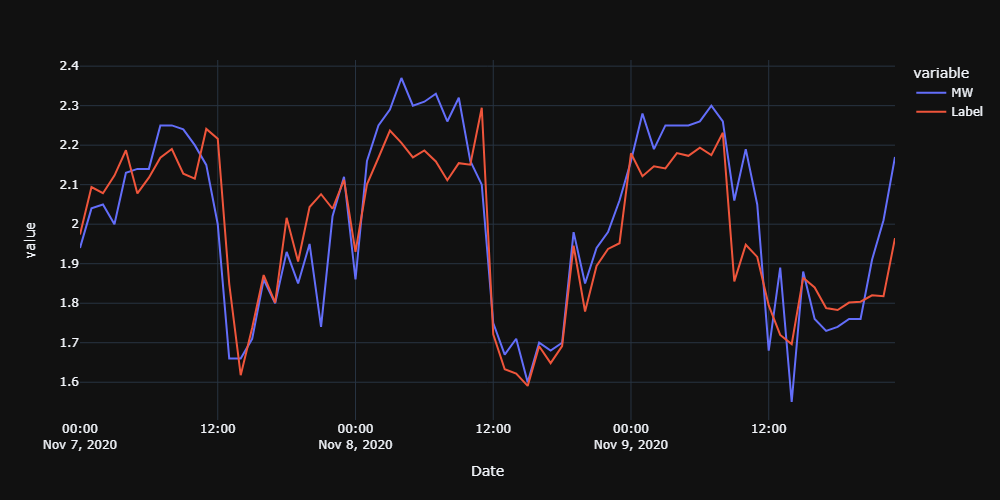

In [36]:
#line plot fort test set only
prediction_holdout['Date']=pd.date_range(start='2020-11-07',periods=72,freq='H')
fig=px.line(prediction_holdout,x='Date',y=['MW','Label'],template='plotly_dark')

fig.show('png',width=1000)

In [37]:
# data
Orig_set_pred=predict_model(lar,data=data)                                          #predict on all original dataset

In [38]:
Orig_set_pred['Date']=pd.date_range(start='2020-08-15',periods=2088,freq='H')       #add a Date

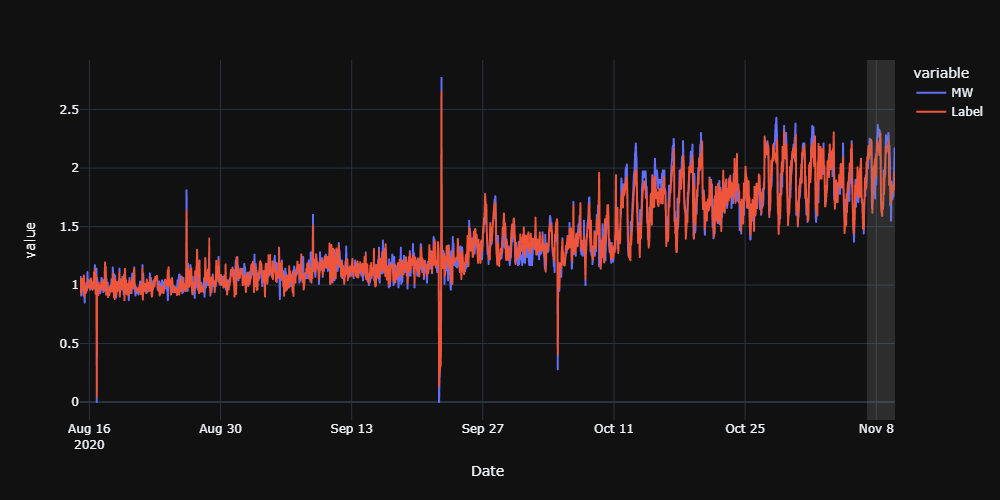

In [39]:
fig=px.line(Orig_set_pred,x='Date',y=['MW','Label'],template='plotly_dark')                 #plot line of all sample prediction (comprised of test set)
fig.add_vrect(x0='2020-11-07',x1='2020-11-10',fillcolor="grey",opacity=0.25,line_width=0)   # add a vertical rectange for test-set separation

fig.show('png',width=1000)

### finalize model (combining trainig and test samples for a model finalization on all available data)

In [40]:
final_model_s4=finalize_model(lar)

In [41]:
final_model_s4.coef_,lar.coef_                                        #????????????????????????? coefficients are equal??

(array([-0.00218928,  1.68343965,  0.05493899,  0.01507917]),
 array([-0.00218928,  1.68343965,  0.05493899,  0.01507917]))

In [42]:
decimals=final_model_s4.coef_
for i in decimals:
    print('%.30f'%i)

decimals_2=lar.coef_
for i in decimals_2:
    print('%.30f'%i)

-0.002189284124778441160269482069
1.683439651819858218217973444553
0.054938985652576287355142170554
0.015079169662221461600815075599
-0.002189284124778441160269482069
1.683439651819858218217973444553
0.054938985652576287355142170554
0.015079169662221461600815075599


### save model (serialize via .pkl embedded in pycaret)

In [43]:
save_model(final_model_s4,'model_s4_090122')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Hour'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=['m3_h', 'Series',
                                                           'Month', 'Day'],
                                       target='MW', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_n...
                 ('fix_perfect', Remove_100(target='MW')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', '

In [44]:
!pip list

Package                       Version
----------------------------- -----------
aiohttp                       3.8.1
aiosignal                     1.2.0
alembic                       1.4.1
analytics-python              1.4.0
ansi2html                     1.7.0
anyio                         3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asgiref                       3.5.0
asttokens                     2.0.5
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
autopage                      0.4.0
autoviz                       0.1.36
azure-core                    1.20.1
azure-storage-blob            12.9.0
backcall                      0.2.0
backoff                       1.10.0
backports.functools-lru-cache 1.6.4
bcrypt                        3.2.0
bleach                        4.1.0
blis                          0.7.5
bokeh                         2.4.2
Boruta        

### Forecast horizon of 3 days ahead (10 to 12 december 2020)
#### prepare future data to simulate model scoring (for final_model_s4) -> forward time is 3 days forward (72 hours)

In [45]:
#generating random component for future m3_h 
#(it is: Array of Random Gaussian Values - https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/)

# from numpy.random import seed
# from numpy.random import randn
# seed(1)
# rdm=randn(72)

#future dataset with selected feature predictors
#adapted from https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63 

future_dates=pd.date_range(start='2020-11-10',periods=72,freq='H')        #3 days (72 hours) temporal forward prediction
# future_dates

future_df = pd.DataFrame()
future_df['Month']=[i.month for i in future_dates]
future_df['Day']=[i.day for i in future_dates]    
future_df['Series']=np.arange(2089,(2089+len(future_dates)))
future_df['m3_h']=prediction_holdout['m3_h']                              #presently the copy of m3_h at test set (7-9 nov=3 days or 72 hours exactly) applies as m3_h estimate...\
                                                                          #note:the planned supply (or a forecasted consumption) of m3_h could be the estimate to enter for forward simulation...\
                                                                          #in particular, a sensistivy analysis can be performed by "simulating" the likely impact of changes in m3_h values in tems of MW savings (especially for nightly hours reduction of m3_h levels...e.g., a drop of 0.5 m3_h value on averge betweeen 3am and 5am,...in tyhis case energy manager would advise issues to alter m3_h in the night...).   
future_df

,Month,Day,Series,m3_h
0,11,10,2089,112.300003
1,11,10,2090,120.400002
2,11,10,2091,119.500000
3,11,10,2092,122.599998
4,11,10,2093,127.000000
...,...,...,...,...
67,11,12,2156,103.300003
68,11,12,2157,103.599998
69,11,12,2158,104.800003
70,11,12,2159,104.800003


### model scoring (final_model_s4) on new 3 days

In [46]:
FWD_pred=predict_model(final_model_s4,data=future_df)      #scoring the finalized model(final_model_s4) on the new 3 days dataset 
FWD_pred                                                   #let's test prediction drift with updated data by siemens

,Month,Day,Series,m3_h,Label
0,11,10,2089,112.300003,1.981351
1,11,10,2090,120.400002,2.101303
2,11,10,2091,119.500000,2.085543
3,11,10,2092,122.599998,2.130099
4,11,10,2093,127.000000,2.194258
...,...,...,...,...,...
67,11,12,2156,103.300003,1.808835
68,11,12,2157,103.599998,1.811169
69,11,12,2158,104.800003,1.827075
70,11,12,2159,104.800003,1.824885


### plot model predictions on 3 days haead
#### get original data

In [47]:
# # read csv file of the original source dataset and subset to 'MW'
# data_2 = pd.read_excel('TEST_1b - for bktst.xls')                  #the xls file here can be replaced by the original source for data object
# data_2=data_2[['MW']]

data_complete=data[['MW']]                                           #original data structure

#### combine orignial data ('MW') with prediction on 3 forcated days (10 to 12 December 2020)

In [48]:
# Label=pd.DataFrame(FWD_pred['Label'])                            #alternative for the subsequent line: Label=FWD_pred[['Label']]
Label=FWD_pred[['Label']]                                          #two brakets [['Label']] if not the data structure does not read it as column
future_dataset=data_complete.append(Label,ignore_index=True)       #generate final dataframe made of 'MW' and 'Label' ..usefule for plotting predictions
future_dataset[2085:2091]                                          #show dtaframe structure with NaN alternarte

,MW,Label
2085,1.91,NaN
2086,2.01,NaN
2087,2.17,NaN
2088,NaN,1.981351
2089,NaN,2.101303
2090,NaN,2.085543


#### add Date

In [49]:
future_dataset['Date']=pd.date_range(start='2020-08-15',periods=2160,freq='H')   #generating a date index Date for this final dataframe (please note the complete lenghts of the set is 2160 samples)
future_dataset[2085:2091]

,MW,Label,Date
2085,1.91,NaN,2020-11-09 21:00:00
2086,2.01,NaN,2020-11-09 22:00:00
2087,2.17,NaN,2020-11-09 23:00:00
2088,NaN,1.981351,2020-11-10 00:00:00
2089,NaN,2.101303,2020-11-10 01:00:00
2090,NaN,2.085543,2020-11-10 02:00:00


#### plot it!

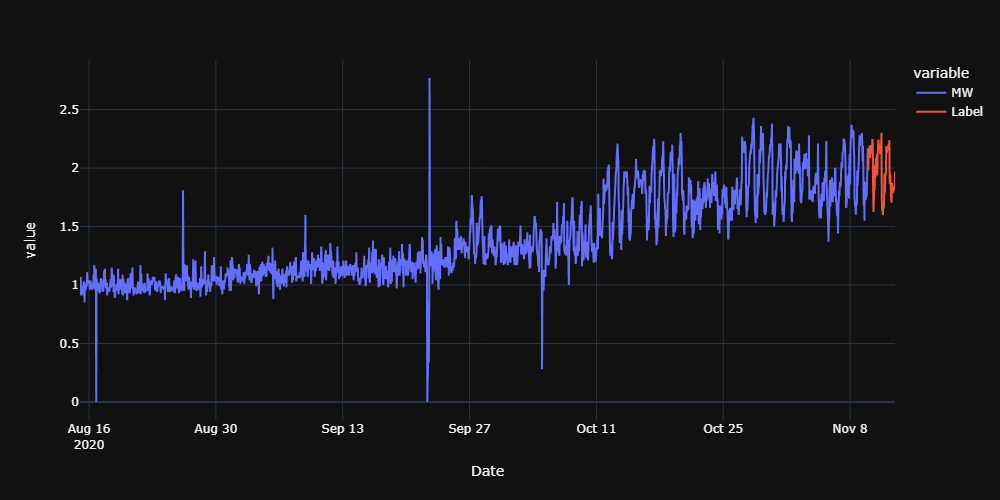

In [50]:
fig=px.line(future_dataset,x='Date',y=['MW','Label'],template='plotly_dark')     #plotting the forcasted new values 3 days ahead

fig.show('png',width=1000)